In [1]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [2]:
# connect to the equational logic database
db = sql3.connect('../Data/DB/eqlogic.db')

In [3]:
df = pd.read_sql_query('SELECT thm_id, name, time_cost, max_mem, num_expansions '
                       'FROM proof_attempts NATURAL JOIN search_settings', db)

In [4]:
db.close()

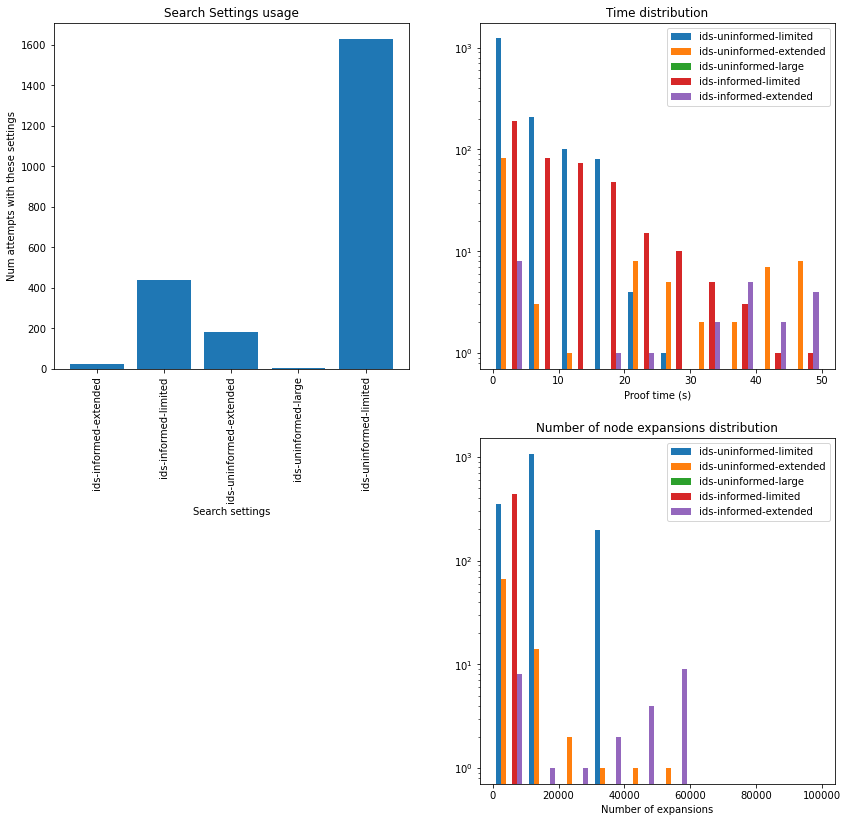

In [36]:
fig = plt.figure(figsize=(14,14))

ss_groups = df.groupby('name').count()['thm_id']
ss_usage = plt.subplot(2, 2, 1)
ss_usage.set_title('Search Settings usage')
ss_usage.set_xlabel('Search settings')
ss_usage.set_ylabel('Num attempts with these settings')
ss_usage.bar(ss_groups.keys(), ss_groups)
plt.xticks(rotation='vertical')

time_graph = plt.subplot(2, 2, 2)
time_graph.set_title('Time distribution')
time_graph.set_xlabel('Proof time (s)')

ss_names, ss_times = pd.unique(df['name']), []
for ss_name in ss_names:
    ss_rows = df[df['name'] == ss_name]
    ss_times.append(ss_rows['time_cost'])
time_graph.hist(ss_times, label=ss_names, bins=10, range=(0.0, 50.0))
time_graph.legend(loc='upper right')
time_graph.set_yscale('log')

exp_graph = plt.subplot(2, 2, 4)
exp_graph.set_title('Number of node expansions distribution')
exp_graph.set_xlabel('Number of expansions')

ss_exps = []
for ss_name in ss_names:
    ss_rows = df[df['name'] == ss_name]
    ss_exps.append(ss_rows['num_expansions'])
exp_graph.hist(ss_exps, label=ss_names, bins=10, range=(0,100000))
exp_graph.legend(loc='upper right')
exp_graph.set_yscale('log')

plt.show()